## LOAN APPLICATION STATUS PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv('loan_prediction.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 13)

##### Dataset have 614 rows and  13 columns.

In [4]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##### About the Columns

##### Loan_ID - This column shows the unique id code of each applicant.

##### Gender - this column tells about the gender of an applicant.

##### Married - This shows that, the marital status of an applicant.

##### Dependents - Dependents shows how many dependents the applicant have.

##### Education - This colun shows the education level of an applicant.

##### Self_Employed - It shows an applicant is self employed or not.

##### ApplicantIncome - This column shows the income of an applicant.

##### CoapplicantIncome - THis column tells about the coapplicants income.

##### LoanAmount - It shows the amount of loan.

##### Loan_Amount_Term - This column shows the loan amount term data.

##### Credit_History - It shows the credit history of an applicant.

##### Property_Area - This column shows the property area of an applicant's house.

##### Loan_Status - It shows the loan status in yes or no.

In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### We can see that, in most of the column there are null values.

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Lots of null values in given dataset. Columns are in float and object datatype. So, first we have to fill the null value.

### Handling the Missing Data

In [7]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)

In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(),inplace=True)

In [10]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan['Credit_History'].fillna(loan['Credit_History'].mean(),inplace=True)

In [12]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)

In [14]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### We fill all the nan values in columns,no we dont have any null values in our dataset.

In [15]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [16]:
sum(loan['CoapplicantIncome']==0)

273

In [17]:
loan['CoapplicantIncome'].replace(0,loan['CoapplicantIncome'].mean(),inplace=True)

In [18]:
sum(loan['CoapplicantIncome']==0)

0

In [19]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,1621.245798,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,1621.245798,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,1621.245798,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,1621.245798,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.000000,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,1621.245798,187.000000,360.0,1.0,Urban,Y


##### We replace all the 0 values in coapplicant income column with the mean of a column.

In [20]:
loan.drop(['Loan_ID'],axis=1,inplace=True)

##### We drop the Loan_ID column from the dataset because it has not much effect on dataset.

### Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

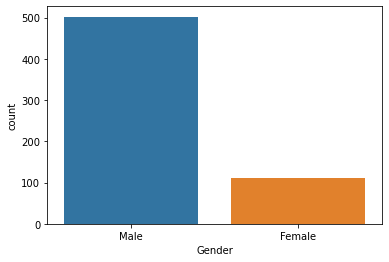

In [21]:
sns.countplot(x = 'Gender',data=loan)

##### From above graph we can see that, the number of male applicant is more than female applicant.

<AxesSubplot:xlabel='Married', ylabel='count'>

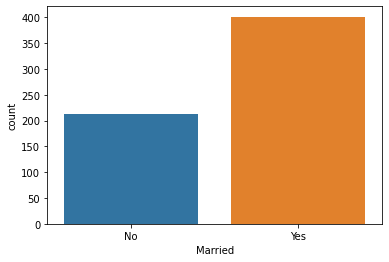

In [22]:
sns.countplot(x = 'Married',data=loan)

##### Above graph tells that married applicant is more than the unmarried applicant.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

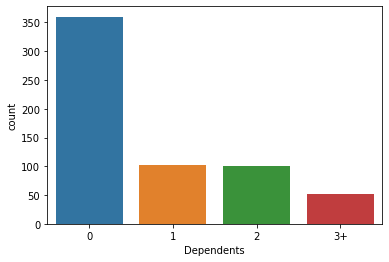

In [23]:
sns.countplot(x = 'Dependents',data=loan)

##### From above graph we can see that, people who have 0 dependents are more applicable for loan than the other people.

<AxesSubplot:xlabel='Education', ylabel='count'>

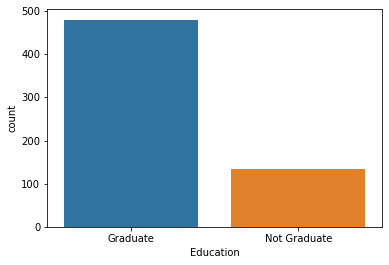

In [24]:
sns.countplot(x = 'Education',data=loan)

##### Number of graduate applicant is more than the non graduate applicant.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

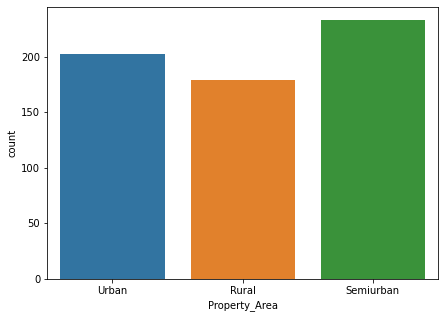

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'Property_Area',data=loan)

##### Number of people from Semiurban area has more applicant for loan than other area.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

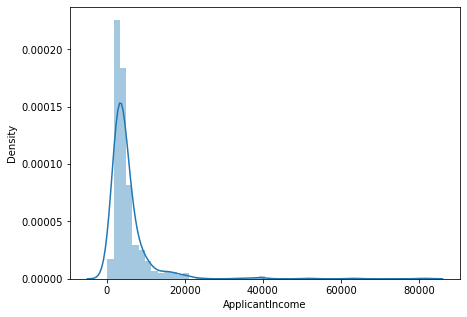

In [26]:
plt.figure(figsize=(7,5))
sns.distplot(loan['ApplicantIncome'])

##### From above distplot we can say that,number of applicant whose income in between 0-15000 are more.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

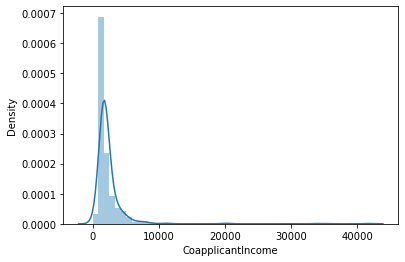

In [27]:
sns.distplot(loan['CoapplicantIncome'])

##### Number of Coapplicant whose income is between 0-10000 are more than the other.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

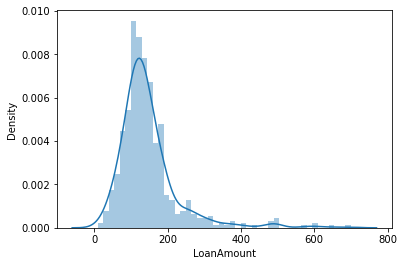

In [28]:
sns.distplot(loan['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

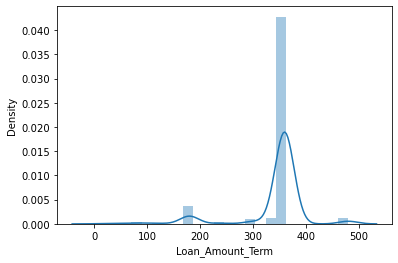

In [29]:
sns.distplot(loan['Loan_Amount_Term'])

### Description

In [30]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2342.092871,146.412162,342.000000,0.842199
std,6109.041673,2621.427966,84.037468,64.372489,0.349681
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,1621.245798,100.250000,360.000000,1.000000
50%,3812.500000,1621.245798,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


##### Description of dataset shows the Mean,Standard Deviation,Minimum value and Maximum value of each column.

Text(0.5, 1.0, 'LOAN Description')

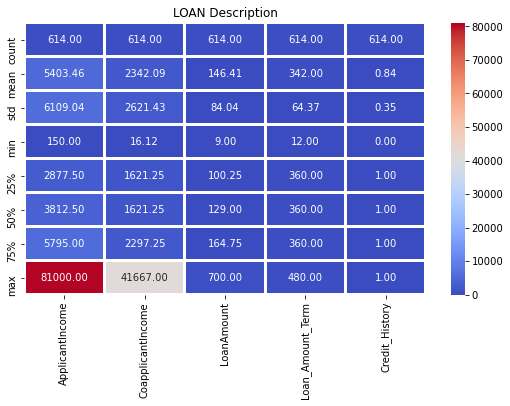

In [31]:
plt.figure(figsize=(9,5))
sns.heatmap(loan.describe(),annot=True,fmt='.2f',linewidths=2, cmap='coolwarm')
plt.title('LOAN Description')

#### Outcome of Description

##### Description of LOAN dataset helps us to clean the data.

Applicant Income - 1.Mean = 5403.46, 2.Std = 6109.04, 3.Min = 150, Max = 81000

Coapplicant Income - 1.Mean = 2342.02, 2.Std = 2621.43, 3.Min = 16.12, Max = 41667

Loan Amount - 1.Mean = 146.41, 2.Std = 84.04, 3.Min = 9, Max = 700

Loan_Amount_Term - 1.Mean = 342, 2.Std = 64.37, 3.Min = 12, Max = 480

Credit_History - 1.Mean = 0.84, 2.Std = 0.35, 3.Min = 0, Max = 1



### Correlation

In [32]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.050734,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.050734,1.000000,0.205388,-0.073197,-0.004508
LoanAmount,0.565620,0.205388,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.073197,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.004508,-0.007738,0.001395,1.000000


<AxesSubplot:>

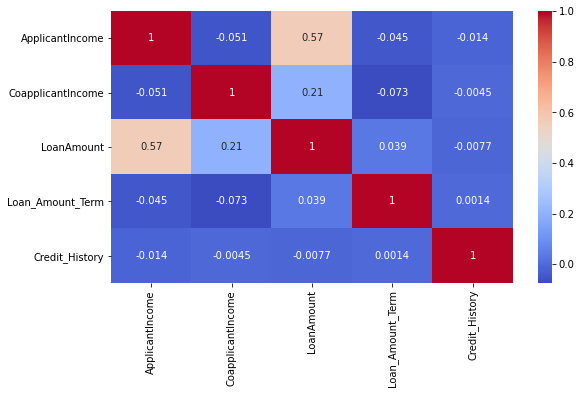

In [33]:
plt.figure(figsize=(9,5))
sns.heatmap(loan.corr(),annot=True,cmap='coolwarm')

##### From above heatmap we can see that, Applicant Income and Loan Amount are 57 percent correlated witn each other which consider to be strong bond. Coapplicant income and Loan amount are 21 percent correlated with each other which consider to be good bond.

In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


##### There ia no null values in Dataset.

### Data Cleaning

### Skewness

In [35]:
loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    9.677699
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

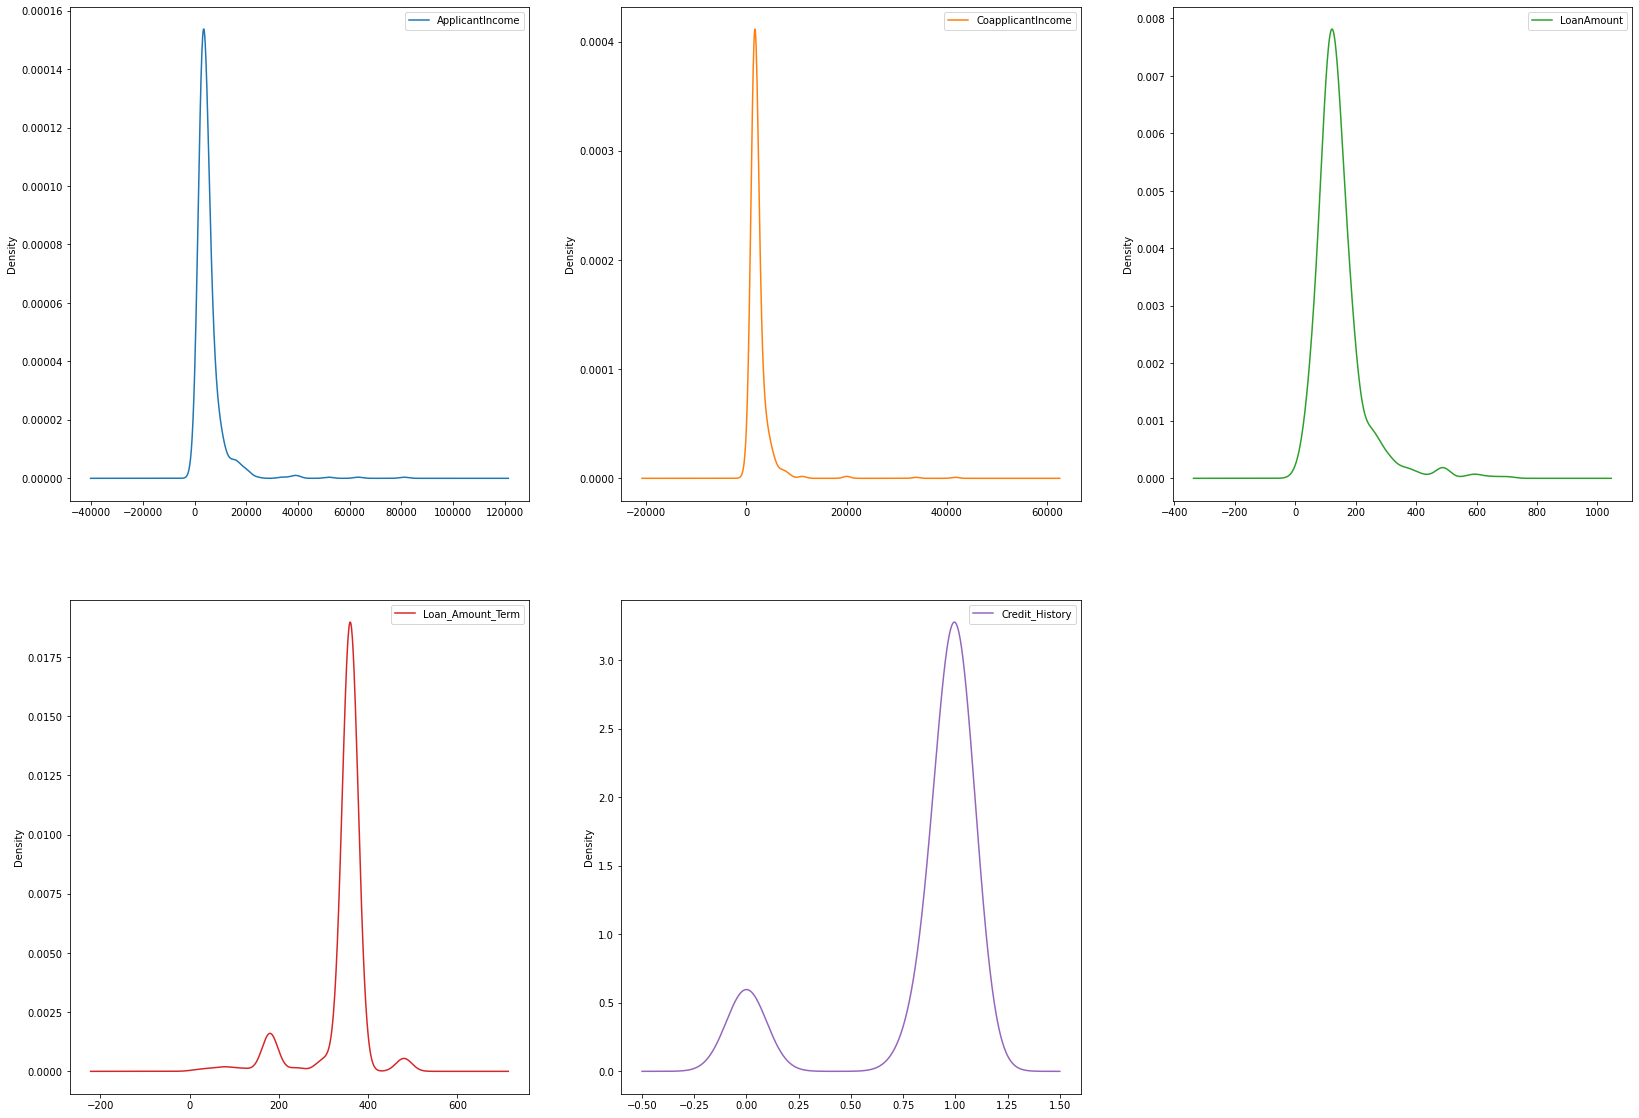

In [36]:
loan.plot(kind = 'density',subplots = True, layout = (2,3), figsize=(28,20), sharex=False)
plt.show()

##### We can see the skewness in data for multiple columns.

In [37]:
loan.skew().sort_values(ascending = False)

CoapplicantIncome    9.677699
ApplicantIncome      6.539513
LoanAmount           2.726601
Credit_History      -1.963600
Loan_Amount_Term    -2.389680
dtype: float64

##### Lets set the skewness threshold as 0.75, we see that

CoapplicantIncome     9.677699

ApplicantIncome       6.539513

LoanAmount            2.726601

Credit_History       -1.963600

Loan_Amount_Term     -2.389680

##### are above the skewness.


### Data Conversion

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
for i in loan.columns:
    if loan[i].dtypes == object:
        loan[i] = le.fit_transform(loan[i].values.reshape(-1,1))

In [40]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,1621.245798,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,1621.245798,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,1621.245798,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,1621.245798,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,1621.245798,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.000000,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,1621.245798,187.000000,360.0,1.0,2,1


In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


##### We do not have any Catagorical Column.

### Checking Outliers

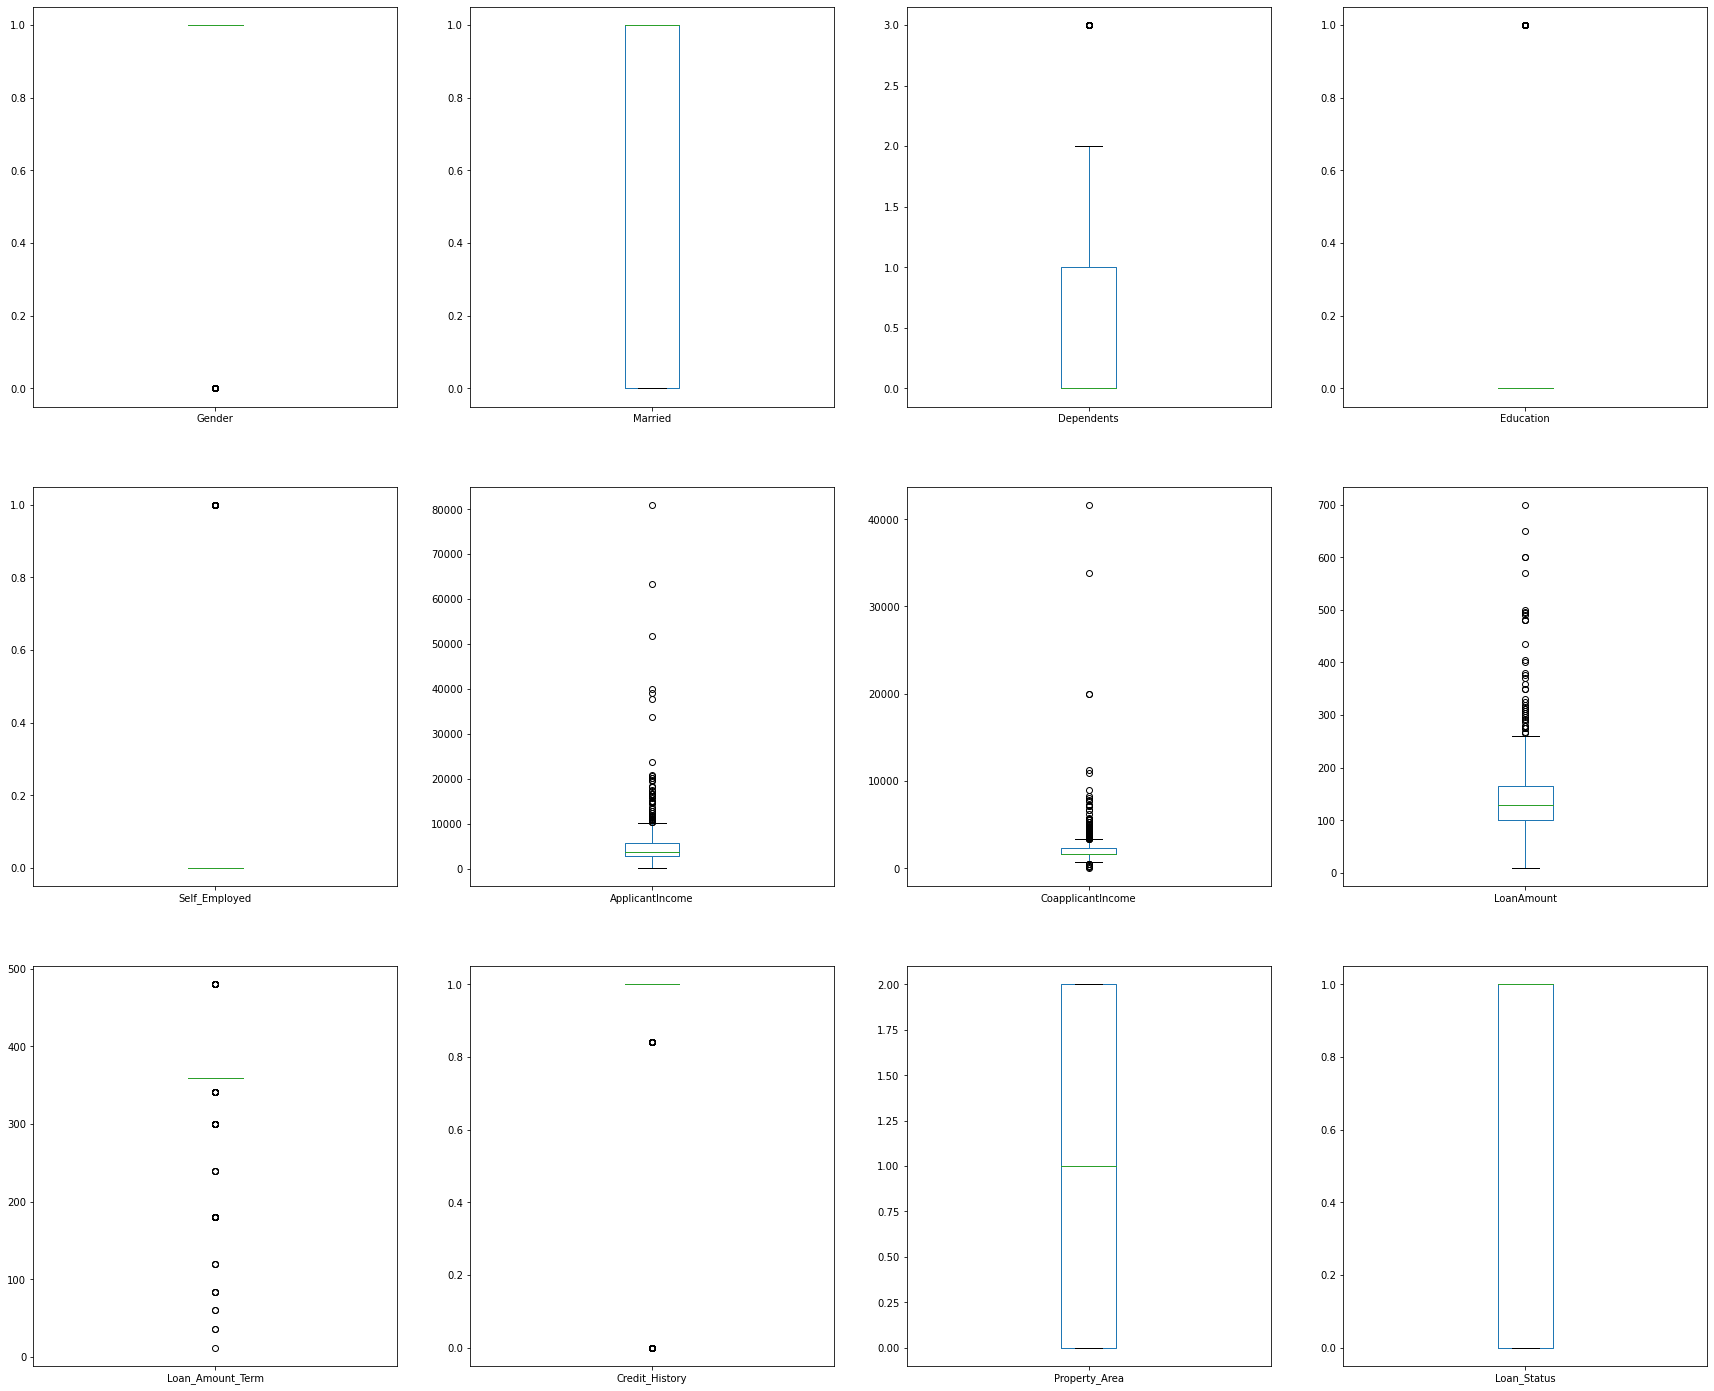

In [42]:
loan.plot(kind = 'box',subplots=True,layout=(3,4),figsize=(30,25))
plt.show()

##### We can see outliers presents in

Loan Amount

Coapplicant Income

Applicant Income

Loan_Amount_Term

Credit_History

Gender

Dependents

Education

Self_Employed

### Removing Outliers

#### Z Score Technique

In [43]:
from scipy.stats import zscore

z = np.abs(zscore(loan))
z.shape

(614, 12)

In [44]:
loan = loan[(z<3).all(axis=1)]
loan.shape

(577, 12)

### Percentage Data Loss

In [45]:
percentage_data_loss = (614-577)/614*100
percentage_data_loss

6.026058631921824

### Splitting the Dataframe into x and y

In [46]:
x = loan.drop('Loan_Status',axis=1)
x.shape

(577, 11)

In [47]:
y = loan['Loan_Status']
y.shape

(577,)

### Normalizing using Power Transform

In [48]:
from sklearn.preprocessing import power_transform
x1 = power_transform(x)

In [49]:
type(x1)

numpy.ndarray

In [50]:
x = pd.DataFrame(x1,columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-0.382888,0.316078,0.142609,0.515236,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,-0.532233,-0.015871,0.142609,0.515236,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-0.382888,-1.443112,0.142609,0.515236,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.421474,-0.169860,0.142609,0.515236,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-0.382888,0.221481,0.142609,0.515236,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-0.382888,-1.301481,0.142609,0.515236,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-0.382888,-2.321865,-2.559206,0.515236,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,-3.739269,1.838099,0.142609,0.515236,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-0.382888,0.961555,0.142609,0.515236,1.194806


In [51]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome    0.210119
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.155094
dtype: float64

In [52]:
x.skew()[np.abs(x.skew()<0.25)].all()

True

##### We remove the skewness from all the columns.

### Scaling the Model

In [53]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
mn

MinMaxScaler()

### Training Process

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [55]:
lr = LogisticRegression()
lr

LogisticRegression()

### Best Random State

In [56]:
maxAccu = 0
maxRs = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    predln = lr.predict(x_test)
    acc = accuracy_score(y_test,predln)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('Best Accuracy is',maxAccu,'on Random State',maxRs)

Best Accuracy is 0.8551724137931035 on Random State 12


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=12)

In [58]:
x_train.shape

(432, 11)

In [59]:
x_test.shape

(145, 11)

In [60]:
y_train.shape

(432,)

In [61]:
y_test.shape

(145,)

### Model Testing

In [62]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print('Accuracy',accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    scr1 = cross_val_score(model,x,y,cv=5)
    print('Cross validation score :',scr1.mean())

#### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
Model(lr)

Accuracy 0.8551724137931035
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        34
           1       0.89      0.93      0.91       111

    accuracy                           0.86       145
   macro avg       0.81      0.77      0.79       145
weighted avg       0.85      0.86      0.85       145

[[ 21  13]
 [  8 103]]
Cross validation score : 0.7989805097451275


#### Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
Model(dt)

Accuracy 0.7241379310344828
              precision    recall  f1-score   support

           0       0.45      0.74      0.56        34
           1       0.90      0.72      0.80       111

    accuracy                           0.72       145
   macro avg       0.67      0.73      0.68       145
weighted avg       0.79      0.72      0.74       145

[[25  9]
 [31 80]]
Cross validation score : 0.6984557721139429


#### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Model(rf)

Accuracy 0.8620689655172413
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        34
           1       0.89      0.94      0.91       111

    accuracy                           0.86       145
   macro avg       0.82      0.78      0.79       145
weighted avg       0.86      0.86      0.86       145

[[ 21  13]
 [  7 104]]
Cross validation score : 0.8042278860569715


#### Extra Tree Classifier

In [70]:
from sklearn.tree import ExtraTreeClassifier

et = ExtraTreeClassifier()
Model(et)

Accuracy 0.7103448275862069
              precision    recall  f1-score   support

           0       0.41      0.53      0.46        34
           1       0.84      0.77      0.80       111

    accuracy                           0.71       145
   macro avg       0.63      0.65      0.63       145
weighted avg       0.74      0.71      0.72       145

[[18 16]
 [26 85]]
Cross validation score : 0.6897901049475262


#### Service Vector Classifier

In [72]:
from sklearn.svm import SVC

svm = SVC()
Model(svm)

Accuracy 0.8896551724137931
              precision    recall  f1-score   support

           0       0.88      0.62      0.72        34
           1       0.89      0.97      0.93       111

    accuracy                           0.89       145
   macro avg       0.88      0.80      0.83       145
weighted avg       0.89      0.89      0.88       145

[[ 21  13]
 [  3 108]]
Cross validation score : 0.8076611694152923


#### KNeighbours Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
Model(kn)

Accuracy 0.8551724137931035
              precision    recall  f1-score   support

           0       0.74      0.59      0.66        34
           1       0.88      0.94      0.91       111

    accuracy                           0.86       145
   macro avg       0.81      0.76      0.78       145
weighted avg       0.85      0.86      0.85       145

[[ 20  14]
 [  7 104]]
Cross validation score : 0.7678110944527736


##### Service vector classifier has a highest accuracy score but the difference between accuracy and cross validation of SVC is more than other models. Logistic regression,Random forest classifier and KNeighbours has same accuracy score.

### Hyper Parameter Tuning

#### Logistic Regression

In [74]:
LogisticRegression()

LogisticRegression()

In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter' : [1,10,100,1000],
              'multi_class' : ['auto', 'ovr', 'multinomial']}

In [77]:
GSC = GridSearchCV(LogisticRegression(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'max_iter': 1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [78]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8482758620689655

#### Decision Tree Classifier

In [79]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [80]:
parameters = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'max_depth' : [2,4,6,8,10],
              'max_features' : ["auto", "sqrt", "log2"]}

In [81]:
GSC = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'random'}

In [82]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8068965517241379

#### Random Forest Classifier

In [83]:
RandomForestClassifier()

RandomForestClassifier()

In [84]:
parameters = {'criterion' : ["gini", "entropy"],
              'max_depth' : [2,4,6,8,10],
              'max_features' : ["auto", "sqrt", "log2"],
              'class_weight' : ["balanced", "balanced_subsample"]}

In [85]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto'}

In [86]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8551724137931035

#### Extra Tree Classifier

In [87]:
ExtraTreeClassifier()

ExtraTreeClassifier()

In [88]:
parameters = {'criterion' : ["gini", "entropy"],
              'splitter' : ["random", "best"],
              'max_depth' : [2,4,6,8,10],
              'max_features' :["auto", "sqrt", "log2"]}

In [89]:
GSC = GridSearchCV(ExtraTreeClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [90]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.7586206896551724

#### KNeighbours Classifier

In [99]:
KNeighborsClassifier()

KNeighborsClassifier()

In [102]:
parameters = {'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [103]:
GSC = GridSearchCV(KNeighborsClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'algorithm': 'auto', 'weights': 'uniform'}

In [104]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8551724137931035

##### After the hyper parameter tuning,accuracy score of Logistic Regression,Random Forest Classifier and Extra Tree Classifier has decrease but the accuracy score of KNeighbours Classifier increase. So we choose KNeighbour Classifier as our final model

<function matplotlib.pyplot.show(close=None, block=None)>

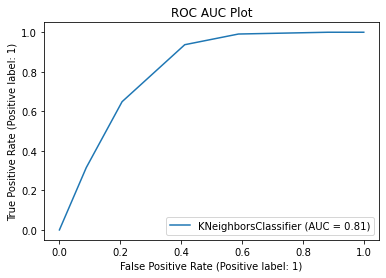

In [105]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GSC.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show

### Saving the Model

In [106]:
import joblib
joblib.dump(GSC.best_estimator_,'LOAN.pkl')

['LOAN.pkl']

##### We saved the model.